# 強化学習における報酬設計

参考

* [Unpacking Reward Shaping: Understanding the Benefits of Reward Engineering on Sample Complexity](https://arxiv.org/abs/2210.09579)
* [Policy invariance under reward transformations](https://people.eecs.berkeley.edu/~pabbeel/cs287-fa09/readings/NgHaradaRussell-shaping-ICML1999.pdf)
* [Heuristic Guided Reinforcement Learning](https://arxiv.org/abs/2106.02757)

強化学習の報酬はどうやって設計すればよいでしょうか？また、既存の報酬関数はもっと良くならないでしょうか？
報酬関数をいじることで学習を高速化する営みをReward Shapingといいます。今回はreward shapingにまつわる理論を見ていきます。



## ポテンシャル関数による報酬の変形

表記

* 吸収状態：$s_0$
* プロパーな遷移確率：$T$
    * 必ず確率$1$で吸収状態に至る
* 変形された報酬関数：$R^\prime=R + F$
    * 報酬変形関数：$F: S \times A \times S \mapsto \mathbb{R}$
* 元のMDP：$M^{\prime}=(S, A, T, \gamma, R)$
* 変形されたMDP：$M^{\prime}=(S, A, T, \gamma, R+F)$


---

**例：Reward Shapingが邪魔になるとき**

例えば自転車に乗ってゴールに向かうタスクを考えましょう。元の問題はゴールに到達すると報酬+1だとします。また、reward shapingによって、「ゴールに向かうと正の報酬」「ゴール以外に向かっても報酬は０」であるとします。
このとき、強化学習は「ゴールから遠ざかって、ゴールに向かう」行動を繰り返し、reward shapingの報酬を最大化するように学習されそうです。

より一般には、次のような状況でReward shapingが邪魔になります：
* $\left(s_1 \rightarrow s_2 \rightarrow \cdots \rightarrow s_n \rightarrow s_1 \rightarrow \cdots\right)$のように状態がサイクルしてしまう
* $\left(F\left(s_1, a_1, s_2\right)+\cdots+F\left(s_{n-1}, a_{n-1}, s_n\right)+F\left(s_n, a_n, s_1\right)>0\right)$のようにサイクル中の報酬変形関数の和が正

---

このようなサイクリックな状況の問題はどうやったら回避できるでしょうか？一番簡単な解決方法は、「$F$をポテンシャル関数の差」にすることです。つまり、

$$
F\left(s, a, s^{\prime}\right)=\Phi\left(s^{\prime}\right)-\Phi(s)
$$

とすれば、
$$F\left(s_1, a_1, s_2\right)+\cdots+F\left(s_{n-1}, a_{n-1}, s_n\right)+F\left(s_n, a_n, s_1\right)=0$$

になります。では、これ以外に解決方法はないでしょうか？また、サイクリックな状況以外は考えなくても良いのでしょうか？

実は、なんらかの仮定を置かない限り、MDP$M$での最適方策と一致するような$F$はこれ以外にはありません。また、この一致性を保証するためには、これ以外のことを気にする必要はありません。

---

**定理**

* 任意の$S, A, \gamma$, そして$F: S \times A \times S \mapsto \mathbb{R}$が与えられたとします.
* $F$は次を満たすとき、ポテンシャル型変形関数と呼びます：$\Phi: S \mapsto \mathbb{R}$ なる実数関数が全ての$s \in S-\left\{s_0\right\}, a \in A, s^{\prime} \in S$について
$$
F\left(s, a, s^{\prime}\right)=\gamma \Phi\left(s^{\prime}\right)-\Phi(s),
$$
を満たす (ただし$\gamma<1$ なら$S-\left\{s_0\right\}=S$). 
このとき、$F$ がポテンシャル型変形関数であることは、次の意味で最適な方策との一致性を保証するための必要十分条件です （$M=(S, A, T, \gamma, R)$ではなく、$M^{\prime}=(S, A, T, \gamma, R+F)$ で学習する場合の話）：

* 十分性：$F$がポテンシャル型変形関数であるとき、$M^\prime$における任意の最適方策は$M$の最適方策と一致する（逆も成立する）
* 必要性：$F$がポテンシャル型変形関数でない場合、つまり、$F\left(s, a, s^{\prime}\right)=\gamma \Phi\left(s^{\prime}\right)-\Phi(s)$を満たすような$\Phi$がない場合、$M^\prime$における最適方策が$M$におけるどの最適方策とも一致しないような、プロパーな$T$と$R$を存在する。

必要性の証明は[Policy invariance under reward transformations](https://people.eecs.berkeley.edu/~pabbeel/cs287-fa09/readings/NgHaradaRussell-shaping-ICML1999.pdf)に任せます。今回は十分性だけ証明してみましょう。


$\gamma=1$のときは$\Phi(s_0)=0$であるとします。これは$\gamma=1$のとき、$\Phi^\prime(s)=\Phi(s)-k$と定数で$F$を変形してもなんの影響もないためです。
まず、元のMDPでは次の最適ベルマン方程式が成り立っています：

$$
Q_M^*(s, a)=\mathrm{E}_{s^{\prime} \sim P_{s a}(\cdot)}\left[R\left(s, a, s^{\prime}\right)+\gamma \max _{a^{\prime} \in A} Q_M^*\left(s^{\prime}, a^{\prime}\right)\right]
$$

一方で、これは次と等価です：

$$
Q_M^*(s, a)-\Phi(s)=\mathrm{E}_{s^{\prime}}\left[ R\left(s, a, s^{\prime}\right)+\gamma \Phi\left(s^{\prime}\right)-\Phi(s) +\gamma \max _{a^{\prime} \in A}\left(Q_M^*\left(s^{\prime}, a^{\prime}\right)-\Phi\left(s^{\prime}\right)\right)\right]
$$

ここで、$\hat{Q}_{M^{\prime}}(s, a) \triangleq Q_M^*(s, a)-\Phi(s)$として、$F\left(s, a, s^{\prime}\right)=\gamma \Phi\left(s^{\prime}\right)-\Phi(s)$を代入すると、

$$
\begin{aligned}
& \hat{Q}_{M^{\prime}}(s, a) \\
& \quad=\mathrm{E}_{s^{\prime}}\left[R\left(s, a, s^{\prime}\right)+F\left(s, a, s^{\prime}\right)+\gamma \max _{a^{\prime} \in A} \hat{Q}_{M^{\prime}}\left(s^{\prime}, a^{\prime}\right)\right] \\
& \quad=\mathrm{E}_{s^{\prime}}\left[R^{\prime}\left(s, a, s^{\prime}\right)+\gamma \max _{a^{\prime} \in A} \hat{Q}_{M^{\prime}}\left(s^{\prime}, a^{\prime}\right)\right]
\end{aligned}
$$

が成立します。これは$M^\prime$における最適ベルマン方程式そのものですね。また、$\gamma=1$の場合は、$\hat{Q}_{M^\prime}(s_0, a)=Q_M^*\left(s_0, a\right)-\Phi\left(s_0\right)=0-0=0$なので、これは唯一の最適Q関数になります。
よって、
$$
\begin{aligned}
\pi_{M^{\prime}}^*(s) & \in \arg \max _{a \in A} Q_{M^{\prime}}^*(s, a) \\
& =\arg \max _{a \in A} Q_M^*(s, a)-\Phi(s) \\
& =\arg \max _{a \in A} Q_M^*(s, a)
\end{aligned}
$$
なので、$M^\prime$における最適方策は$M$における最適方策と一致します。また、次も成り立ちます：

$$
\begin{aligned}
Q_{M^{\prime}}^*(s, a) & =Q_M^*(s, a)-\Phi(s), \\
V_{M^{\prime}}^*(s) & =V_M^*(s)-\Phi(s) .
\end{aligned}
$$

また、これは任意の方策$\pi$についても成り立ちます。つまり、$V_{M^{\prime}}^\pi(s)=V_M^\pi(s)-\Phi(s)$です。
(このことから、報酬自体がポテンシャル関数の場合、どの方策も最適方策になることがわかります)

---

TODO: 実験

## ヒューリスティック関数によるガイド

現実世界では、MDPの事前知識を持っていることが少なくありません。特に、事前知識を利用すれば最適価値関数の推定がある程度できる場合があります。　
例えばエキスパートのデータセットを持っていれば、モンテカルロ推定で$V^*$が推定できますし、事前に蓄えたデータがある場合、offline RLで$V^*$が得られます。

$V^*$が事前にわかっている場合を考えてみましょう。この場合、$V^*$に貪欲に動けば良いので、最適方策は一撃で求まるべきですね。
しかし、先程のポテンシャル型変形関数では$R^\prime(s, a) = R(s, a) + \gamma V^*(s^\prime) - V^*(s)$としても一撃で最適方策が求まるわけではなさそうです。（$V^*_{M^\prime}(s)=0$になるので学習は楽になるかもしれません。）

学習を早めるためには、変形された報酬関数に貪欲に動けば良い方策が得られることを教える必要があります。
[Heuristic Guided Reinforcement Learning](https://arxiv.org/abs/2106.02757)では、これを達成するために次のようなMDPを考えます。

* 変形されたMDP：$\widetilde{\mathcal{M}}_n:=\left(\mathcal{S}, \mathcal{A}, P, \widetilde{r}_n, \widetilde{\gamma}_n\right)$
* 変形された報酬：$\widetilde{r}_n(s, a):=r(s, a)+\left(1-\lambda_n\right) \gamma \mathbb{E}_{s^{\prime} \mid s, a}\left[h\left(s^{\prime}\right)\right]$
* 変形された割引率：$\widetilde{\gamma}_n:=\lambda_n \gamma$

NOTE：**これは多分$\kappa$-greedy方策と同じじゃないかな？[Multi-Step RL](https://github.com/syuntoku14/Shumi-Note/blob/main/notebooks/multi_step_RL.ipynb)の回でやったが、$\kappa$-greedy方策では$\widetilde{r}(s, a):=r(s, a)+\left(1-\kappa\right) \gamma \mathbb{E}_{s^{\prime} \mid s, a}\left[v\left(s^{\prime}\right)\right]$で学習するので、かなり似てる。**


ちなみにHuRLでは次の定理が成り立ちます：　

---

任意の$\pi$とヒューリスティック関数$h:\mathcal{S}\to \mathbb{R}$、そして係数$\lambda\in [0, 1]$について、

$$
V^*\left(d_0\right)-V^\pi\left(d_0\right)=\operatorname{Regret}(h, \lambda, \pi)+\operatorname{Bias}(h, \lambda, \pi)
$$

が成立する。ここで、

$$
\begin{aligned}
\operatorname{Regret}(h, \lambda, \pi) & :=\lambda\left(\widetilde{V}^*\left(d_0\right)-\widetilde{V}^\pi\left(d_0\right)\right)+\frac{1-\lambda}{1-\gamma}\left(\widetilde{V}^*\left(d^\pi\right)-\widetilde{V}^\pi\left(d^\pi\right)\right) \\
\operatorname{Bias}(h, \lambda, \pi) & :=\left(V^*\left(d_0\right)-\widetilde{V}^*\left(d_0\right)\right)+\frac{\gamma(1-\lambda)}{1-\gamma} \mathbb{E}_{s, a \sim d^\pi} \mathbb{E}_{s^{\prime} \mid s, a}\left[h\left(s^{\prime}\right)-\widetilde{V}^*\left(s^{\prime}\right)\right]
\end{aligned}
$$

である。また、$\forall b \in \mathbb{R}, \operatorname{Bias}(h, \lambda, \pi)=\operatorname{Bias}(h+b, \lambda, \pi)$ と　$\operatorname{Regret}(h, \lambda, \pi)=\operatorname{Regret}(h+b, \lambda, \pi)$もなりたつ。

証明は簡単なので論文に任せます。

---

論文中のFigure 1を再現してみます。

In [1]:
import numpy as np
from functools import partial
from typing import Optional, NamedTuple
import jax.numpy as jnp

def create_rew_P():
    """ double_chain MDP (報酬関数, 遷移確率) を作成します
    Returns:
        rew (float): 報酬関数
        P (float): 遷移確率
    """
    S = 10
    A = 2

    # 論文に従った報酬関数を作ります
    rew = np.zeros((S, 2))
    rew[1, 0] = 0.1
    rew[3, 1] = -0.2
    rew[4, 1] = 0.1
    rew[S-2, 1] = 1

    # 1を選ぶと右に, 0を選ぶと左に動きます。
    P = np.zeros((S, A, S))
    for s in range(S):
        P[s, 0, max(0, s-1)] = 1.0
        P[s, 1, min(s+1, S-1)] = 1.0

    # 両端は吸収状態です
    P[0, :, :] = 0
    P[0, :, 0] = 1.0
    P[S-1, :, :] = 0.0
    P[S-1, :, S-1] = 1.0
 
    np.testing.assert_almost_equal(P.sum(axis=-1), 1)
    return jnp.array(rew), jnp.array(P)


class MDP(NamedTuple):
    S_array: np.array  # 状態空間
    A_array: np.array  # 行動空間
    gamma: float  # 割引率
    horizon: int  # ホライゾン
    rew: float  # 報酬関数
    P: float  # 遷移確率
    optimal_Q: Optional[np.ndarray] = None  # 最適Q値
    optimal_Q_idx: Optional[np.ndarray] = None  # 後でplot用に使います

    @property
    def S(self) -> int:  # 状態空間のサイズ
        return len(self.S_array)

    @property
    def A(self) -> int:  # 行動空間のサイズ
        return len(self.A_array)


S = 10
A = 2
S_array = np.arange(S)
A_array = np.arange(A)
gamma = 0.9
horizon = 10

# Double chain MDP を作ります
rew, P = create_rew_P()
mdp = MDP(S_array, A_array, gamma, horizon, rew, P)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
import jax
import jax.numpy as jnp
import numpy as np
from functools import partial


@jax.jit
def compute_greedy_policy(Q: np.ndarray):
    """Q関数の貪欲方策を返します

    Args:
        Q (np.ndarray): (SxA)の行列

    Returns:
        greedy_policy (np.ndarray): (SxA)の行列
    """
    greedy_policy = jnp.zeros_like(Q)
    S, A = Q.shape
    greedy_policy = greedy_policy.at[jnp.arange(S), Q.argmax(axis=1)].set(1)
    assert greedy_policy.shape == (S, A)
    return greedy_policy


@partial(jax.jit, static_argnames=("S", "A"))
def _compute_optimal_Q(mdp: MDP, S: int, A: int):
    """MDPについて、ベルマン最適作用素を複数回走らせて最適価値関数を動的計画法で計算します。
    Args:
        mdp (MDP)

    Returns:
        optimal_Q (np.ndarray): (SxA)の行列
    """

    def backup(optimal_Q):
        next_v = mdp.P @ optimal_Q.max(axis=1)
        assert next_v.shape == (S, A)
        return mdp.rew + mdp.gamma * next_v
    
    optimal_Q = jnp.zeros((S, A))
    body_fn = lambda i, Q: backup(Q)
    return jax.lax.fori_loop(0, mdp.horizon + 100, body_fn, optimal_Q)

compute_optimal_Q = lambda mdp: _compute_optimal_Q(mdp, mdp.S, mdp.A)


@jax.jit
def compute_policy_Q(mdp: MDP, policy: np.ndarray):
    """MDPと方策について、ベルマン期待作用素を複数回走らせて価値関数を動的計画法で計算します。
    Args:
        mdp (MDP)
        policy (np.ndarray): (SxA)の行列

    Returns:
        optimal_Q (np.ndarray): (SxA)の行列
    """
    S, A = policy.shape

    def backup(policy_Q):
        max_Q = (policy * policy_Q).sum(axis=1)
        next_v = mdp.P @ max_Q
        assert next_v.shape == (S, A)
        return mdp.rew + mdp.gamma * next_v
    
    policy_Q = jnp.zeros((S, A))
    body_fn = lambda i, Q: backup(Q)
    return jax.lax.fori_loop(0, mdp.horizon + 100, body_fn, policy_Q)


# 動的計画法による最適価値関数
mdp = mdp._replace(optimal_Q=compute_optimal_Q(mdp))
optimal_V = mdp.optimal_Q.max(axis=1)

# ランダムな方策の価値
random_policy = np.ones((S, A)) / A
random_V = compute_policy_Q(mdp, random_policy).max(axis=1)

# 悪いヒューリスティック
bad_V = np.zeros(S)
bad_V[1] = 0.10
bad_V[2] = 0.05

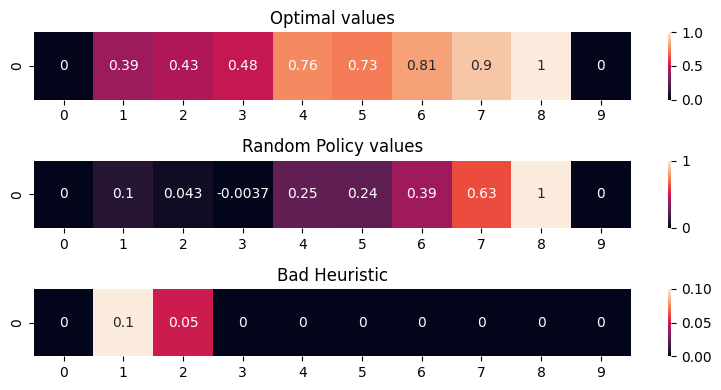

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

plt.subplot(3, 1, 1)
sns.heatmap([optimal_V], annot=True)
plt.title("Optimal values")

plt.subplot(3, 1, 2)
sns.heatmap([random_V], annot=True)
plt.title("Random Policy values")

plt.subplot(3, 1, 3)
sns.heatmap([bad_V], annot=True)
plt.title("Bad Heuristic")

plt.tight_layout()


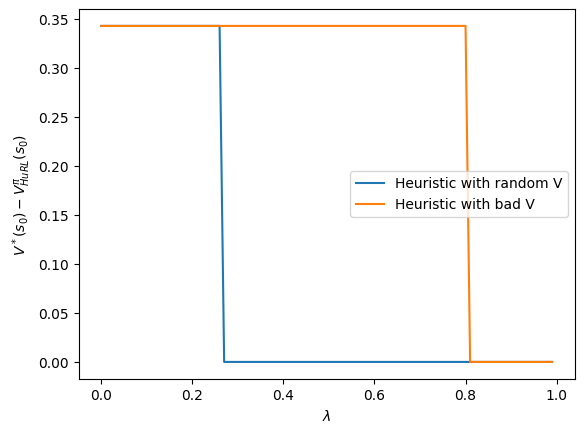

In [4]:
# HuRLを解きます

def create_heuristic_mdp(lam: float, h: np.array):
    """HuRLに基づいて、HeuristicなMDPを作ります"""
    assert h.shape == (S,)
    next_h = mdp.P @ h
    hu_rew = mdp.rew + (1 - lam) * mdp.gamma * next_h
    hu_gamma = mdp.gamma * lam
    HuRL_mdp = mdp._replace(rew=hu_rew, gamma=hu_gamma)
    return HuRL_mdp


lams = np.linspace(0.0, 0.99, 100)
init_s = 2
good_scores = []
bad_scores = []

for lam in lams:
    hu_mdp = create_heuristic_mdp(lam, random_V)
    hu_policy = compute_greedy_policy(compute_optimal_Q(hu_mdp))
    hu_score = mdp.optimal_Q[init_s].max() - compute_policy_Q(mdp, hu_policy)[init_s].max()
    good_scores.append(hu_score)

    hu_mdp = create_heuristic_mdp(lam, bad_V)
    hu_policy = compute_greedy_policy(compute_optimal_Q(hu_mdp))
    hu_score = mdp.optimal_Q[init_s].max() - compute_policy_Q(mdp, hu_policy)[init_s].max()
    bad_scores.append(hu_score)

plt.plot(lams, good_scores, label="Heuristic with random V")
plt.plot(lams, bad_scores, label="Heuristic with bad V")

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$V^*(s_0) - V^\pi_{HuRL}(s_0)$")
plt.legend()

## Reward Shapingによるサンプル効率の向上

参考
* [Unpacking Reward Shaping: Understanding the Benefits of Reward Engineering on Sample Complexity](https://arxiv.org/abs/2210.09579)

表記
* 遷移確率：$\mathbb{P}^{\star}(\cdot \mid s, a)$
* 報酬変形関数：$\widetilde{V}$


これまでは「１．最適方策にagnosticな報酬変形関数の設計方法」と、「２．ヒューリスティック関数を導入してホライゾンへの依存を短縮する学習方法」の２つについて学びました。
では、Reward Shapingは実際にサンプル効率やリグレットを向上できるのでしょうか？

---

**直感：Reward Shapingの利点**

![Unpacking Reward ShapingのFigure 1](figs/reward_shaping1.png)

直感的には、Reward Shapingは**探索空間を大幅に狭める**働きがあります。例えば上のような迷路（論文のFigure1）を例に考えてみます。
緑がスタート地点で、赤がゴール地点とします。このとき、何の事前情報もなしに探索を行う場合、真ん中の画像のように迷路の全てを探索する必要があります。
一方で、適切なReward Shapingによって左半分を切り捨てられる場合、探索空間は右半分で済みます。

---

この直感に基づいて、UCBVIにReward Shapingを追加したUCBVI-Shapedが論文中で提案されています。
インフォーマルには、次のようなリグレットバウンドが成立します：

$$
\operatorname{Regret}(T)=\mathcal{O}\left(B(\widetilde{V}, \mathcal{M}) \log (T / \delta)+\text { Regret }-\operatorname{UCBVI}\left(\mathcal{S}_{\text {remain }}, \mathcal{A}, T\right)\right)
$$

ここで、$\mathcal{S}_{\text {remain }}$は報酬変形関数によって「切り捨てられなかった状態」、$\text { Regret }-\operatorname{UCBVI}\left(\mathcal{S}_{\text {remain }}, \mathcal{A}, T\right)$はUCBVIのリグレットの上界、そして$B(\widetilde{V}, \mathcal{M}) \log (T / \delta)$は$\mathcal{M}$と$\widetilde{V}$の質のみに依存する項です。
よって、リグレットで重要になる項は２項目だけであり、特に$\mathcal{S}_{\text {remain }}$がもとの$\mathcal{S}$よりも遥かに小さければ、このリグレットはとても小さく抑えられます。

このUCBVI-Shapedアルゴリズムについて具体的に見ていきましょう。

---

**UCBVI-Shapedアルゴリズム**

* 1: Input reward function $r$ (assumed to be known), confidence parameters
* 2: for $t=1, \ldots, T$
* 3: $\quad$ Compute $\widehat{P}_t$ using all previous empirical transition data as $\widehat{\mathbb{P}}_t\left(s^{\prime} \mid s, a\right):=\frac{N_h^t\left(s, a, s^{\prime}\right)}{N_h^t(s, a)}, \forall h, s, a, s^{\prime}$.
* 4: $\quad$ Compute reward bonus $b_h^t(s, a)$ from Eqn. 1 (roughly of order $\frac{\tilde{V}}{\sqrt{N(s, a)}}) \quad \triangleright$ Bonus scaling
* 5: Run Value-Iteration with Projection (Algorithm 2).
* 6: Set $\pi_t$ as the returned policy of VI.
* 7: End for

**Value-Iteration with Projection**

* 1: Input $\left\{\widehat{P}_t, r+b_h^t\right\}_{h=0}^{H-1}$
* 2: $\widehat{V}_H^t(s)=0, \forall s, \widehat{Q}_h^t(s, a)$
* 3: While not converged
* 4: $\quad \widehat{Q}_h^t(s, a)=\min \left\{r_h(s, a)+b_h^t(s, a)+\widehat{\mathbb{P}}_t(\cdot \mid s, a) \cdot \widehat{V}_{h+1}^t, H\right\}$
* 5: $\quad \widehat{V}_h^t(s)=\min \left(\max _a \widehat{Q}_h^t(s, a), \beta \widetilde{V}(s)\right)$ $\quad \triangleright$ Value projection
* 6: $\pi_h^t(s)=\arg \max _a \hat{Q}_h^t(s, a), \forall h, s, a$

ここで、ボーナス項は　
$$
b_h^t(s, a)=\min \left(16 \beta \sqrt{\frac{\widehat{\mathbb{E}}_{s^{\prime} \sim \widehat{\mathbb{P}}_t(\cdot \mid s, a)}\left[\widetilde{V}_{h+1}^2\left(s^{\prime}\right) \mid s, a\right] \ln \frac{2|\mathcal{S}||\mathcal{A}|}{\delta}}{N_h^t(s, a)}}+\frac{12 \beta \widetilde{V}^{\max }}{N_h^t(s, a)} \ln \frac{2|\mathcal{S}||\mathcal{A}| t}{\delta}, 2 \beta \widetilde{V}^{\max }\right)
$$

によって計算されます。
また、$\widetilde{V}_h^{\max }=\max _{s^{\prime}} \widetilde{V}_h\left(s^{\prime}\right)$ かつ$\widetilde{V}^{\max }=\max _{s^{\prime}, h^{\prime}} \widetilde{V}_{h^{\prime}}\left(s^{\prime}\right)$です。

### UCBVI-Shapedの解析

まず、報酬変形関数にいくつか仮定が必要です：

---

**仮定１：事前知識のクオリティ**

報酬変形関数$\widetilde{V}$は何らかの$\beta \geq 1$について、次を満たす：$V_h^{\star}(s) \leq \beta \widetilde{V}_h(s)$

この$\beta$はアルゴリズムの中で学習します。これによって、いくつかの状態について$\widetilde{V}(s) < V_h^{\star}(s)$になるように$\widetilde{V}$を定義できるようにします。

---

---

**仮定２：報酬のスケール**

$r(s, a)\in [0, 1]$

---

---

**仮定３：状態の時刻依存性**

状態$\mathcal{S}$は$h$-indexedとする。つまり、$h$で到達可能な状態は$h^\prime \neq h$で到達可能な状態とは独立である。

---


このとき、UCBVIと似たようなOptimismが成り立ちます。つまり、確率$1-\delta$以上で、

$$
\widehat{V}_0^t\left(s_0\right) \geq V_0^{\star}\left(s_0\right), \forall s_0 \in \mathcal{S} ; \quad \text { and } \quad \widehat{Q}_h^t(s, a) \geq Q_h^{\star}(s, a), \quad \forall(s, a) \in \mathcal{S} \times \mathcal{A}
$$

が成り立ちます。また、Simulation Lemmaから

$$
V^{\star}\left(s_0\right)-V^{\pi_t}\left(s_0\right) \leq \widehat{V}_1^t\left(s_0\right)-V^{\pi_t}\left(s_0\right)=\mathbb{E}_{\tau \sim \pi_t}\left[\sum_{h=1}^H b_h^t\left(s_h, a_h\right)+\left(\widehat{\mathbb{P}}_h^t\left(\cdot \mid s_h, a_h\right)-\mathbb{P}^{\star}\left(\cdot \mid s_h, a_h\right)\right) \cdot \widehat{V}_{h+1}^{\pi_t}\right] .
$$

も成り立ちます。
これを使って、なぜ$\widetilde{V}$を使うと探索する空間が削減できるのか、直感的に解説します：

---

**直感的な$\widetilde{V}$の利点**

まず、事前知識$\widetilde{V}$によって定義される「補助Q関数」を定義します：

$$
\widetilde{Q}_h^u(s, a)=\mathbb{E}_{s^{\prime} \sim \mathbb{P}(\cdot \mid s, a)}\left[r(s, a)+\beta \tilde{V}_{h+1}\left(s^{\prime}\right)\right]
$$

これは仮定１より$Q_h^{\star}(s, a) \leq \widetilde{Q}_h^u(s, a)$です。これを踏まえて、アルゴリズムについての性質をいくつか見てみましょう。特に、非最適な行動$a$について、Q関数がどのような振る舞いをするか見てみます。

まず、$\widetilde{Q}_h^u(s, a)<V_h^{\star}(s)$の場合を考えてみましょう。つまり、$a$が非最適な場合です。このとき、次が成り立ちます。
$$Q_h^{\star}(s, a) \leq \widetilde{Q}_h^u(s, a)<V_h^{\star}(s) \leq \widehat{Q}_h^t\left(s, \pi_*(s)\right)$$

一番右の不等式はOptimismのせい、一番左はAssumptionのせいです。
ここで、アルゴリズムのclippingの部分のおかげで、$\widehat{Q}_h^t(s, a)$はすぐに$\widetilde{Q}_h^u(s, a)$によってバウンドされた値に収束します。つまり、$\widehat{Q}_h^t(s, a) \leq \widetilde{Q}_h^u(s, a) \leq \widehat{Q}_h^t\left(s, \pi_*(s)\right)$みたいな不等式がすぐに成立します。
よって、$\widetilde{Q}_h^u(s, a)<V_h^{\star}(s)$を満たすような非最適な行動はすぐに選択されなくなります。
また、このような不等式を満たす状態行動もすぐに遷移されなくなります。

---

